### We will construct a linear model that can predict a car's mileage (mpg) by using its other attributes.

In [4]:
import pandas as pd
import numpy as np
# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# transfer data 
from sklearn.preprocessing import PowerTransformer
# seaborn theme
sns.set_theme('paper',font_scale=2)
sns.set_style('ticks')


### Understanding different kind of distributions
 

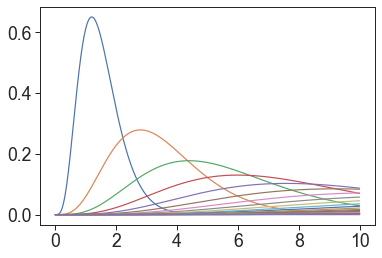

In [5]:
# define x-axis value 
x = np.linspace (0, 10, 1000) 

#calculate pdf of Gamma distribution for each x-value
for i in np.arange(0.3,10,0.4):
    y = stats.gamma.pdf(x, a=5, scale=i)

    #create plot of Gamma distribution
    plt.plot(x, y)

#display plot
plt.show()

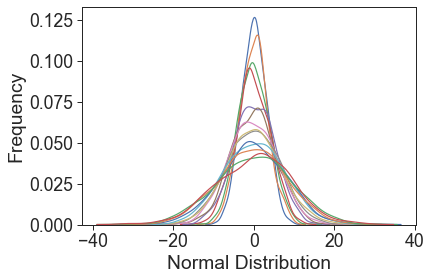

In [6]:
#calculate pdf of Gamma distribution for each x-value
for i in np.arange(3,10,0.5):
    y = stats.norm.rvs(loc=0, scale=i,size=1000)
    ax = sns.kdeplot(y)
                                   
                 
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

plt.show()


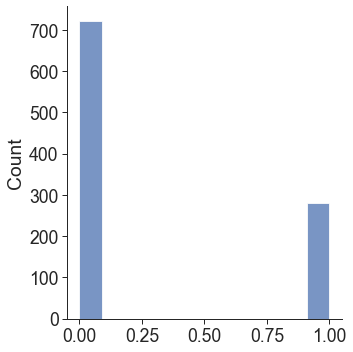

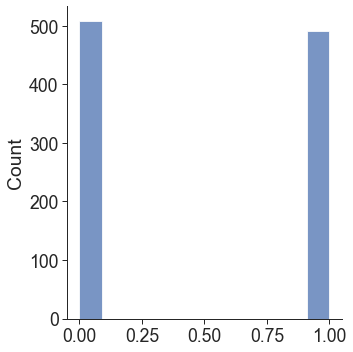

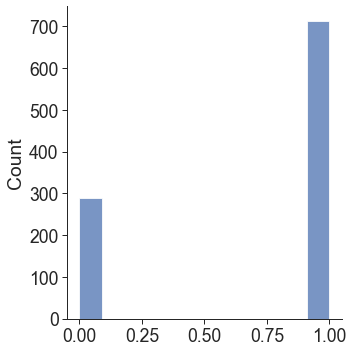

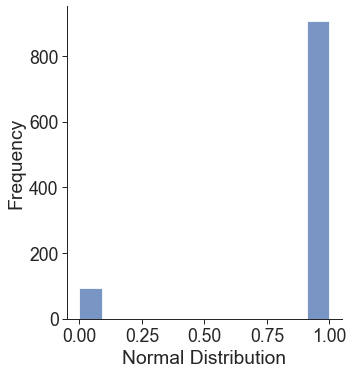

In [7]:
#calculate pdf of Gamma distribution for each x-value
for i in np.arange(0.3,1,0.2):
    y = stats.binom.rvs(n=1,p=i,size=1000)
    ax = sns.displot(y)
                                   
                 
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

plt.show()

### Data Description: 
1. mpg: miles per gallon
2. weight: weight of the car in pounds


## Load and explore the data

In [10]:
cData = pd.read_csv("auto-mpg.csv")

In [11]:
cData.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
94,13.0,8,440.0,215,4735,11.0,73,1,chrysler new yorker brougham
22,25.0,4,104.0,95,2375,17.5,70,2,saab 99e
87,13.0,8,350.0,145,3988,13.0,73,1,chevrolet malibu
222,17.0,8,260.0,110,4060,19.0,77,1,oldsmobile cutlass supreme
249,19.9,8,260.0,110,3365,15.5,78,1,oldsmobile cutlass salon brougham


In [75]:

cData[[	'mpg','weight']].head()

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


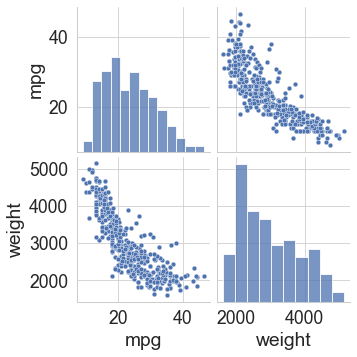

In [36]:
# checking the distribution of variables in training set with dependent variable
sns.pairplot(cData[["mpg", "weight"]])
plt.show()

### Observation 
The 'weight' column has a nonlinear relationship with 'mpg'.   
We will transfer it into normal distribution using the power transform from sklearn. 

# Case 1
Normal distribution 

In [46]:
pwt=PowerTransformer(method='box-cox',standardize=True)
cData['mpg_pwt']=pwt.fit_transform(cData['mpg'].values.reshape(-1, 1))

Text(0.5, 1.0, 'Normal Distribution')

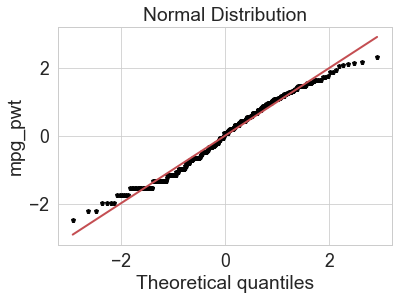

In [47]:
ax=plt.subplot(111)
prob=stats.probplot(cData['mpg_pwt'],dist='norm',plot=plt);
ax.get_lines()[0].set_marker('p')
ax.get_lines()[0].set_markerfacecolor('black')
ax.get_lines()[0].set_markeredgecolor('black')
ax.get_lines()[0].set_markersize(5.0)
ax.get_lines()[1].set_linewidth(2.0)
ax.set_ylabel('mpg_pwt')
ax.set_title('Normal Distribution')

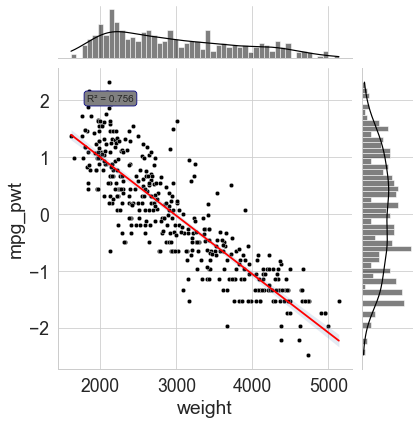

In [48]:
r, p = stats.pearsonr(cData['weight'],cData['mpg_pwt'])
joint_plot=sns.jointplot(height=6,data=cData,x=cData['weight'],y=cData['mpg_pwt'],color='black',s=20,marginal_kws=dict(bins=50,kde=True))
reg_plot=sns.regplot(data=cData,x=cData['weight'],y=cData['mpg_pwt'],scatter=False,ax=joint_plot.ax_joint,order=1)
joint_plot.ax_joint.annotate(f'R\u00b2 = {r**2:.3f}',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'gray', 'ec': 'navy'})
regline = reg_plot.get_lines()[0]
regline.set_color('red')
regline.set_zorder(3)

<AxesSubplot:xlabel='weight', ylabel='mpg_pwt'>

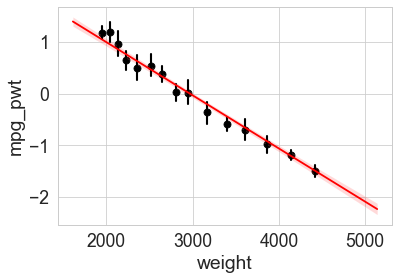

In [49]:
sns.regplot(data=cData,x=cData['weight'],y=cData['mpg_pwt'],x_bins=15,scatter=True,order=1,
            scatter_kws={'color': 'black'}, line_kws={'color': 'red'}
            )

Text(0.5, 1.0, 'Residual ')

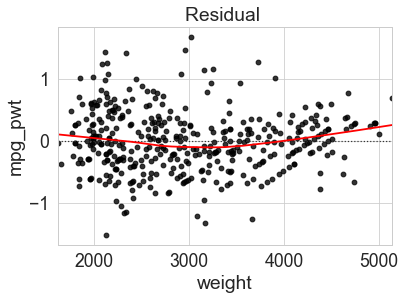

In [50]:
sns.residplot(data=cData,x='weight',y='mpg_pwt',lowess=True,scatter_kws={'color':'black'},line_kws={'color':'red'})
plt.title('Residual ')

# Case 2
Gamma Distribution 

In [54]:
cData['inverse_mpg']=1/cData['mpg']

Text(0.5, 1.0, 'Gamma Distribution')

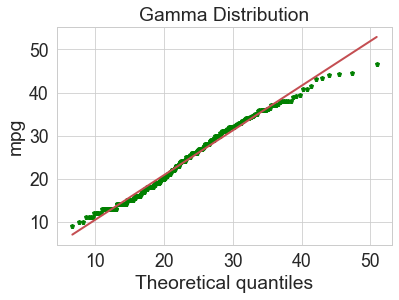

In [55]:
ax=plt.subplot(111)
prob=stats.probplot(cData['mpg'],dist='gamma',plot=plt,sparams=(9.05,0, 2.5));
ax.get_lines()[0].set_marker('p')
ax.get_lines()[0].set_markerfacecolor('green')
ax.get_lines()[0].set_markeredgecolor('green')
ax.get_lines()[0].set_markersize(5.0)
ax.get_lines()[1].set_linewidth(2.0)
ax.set_ylabel('mpg')
ax.set_title('Gamma Distribution')

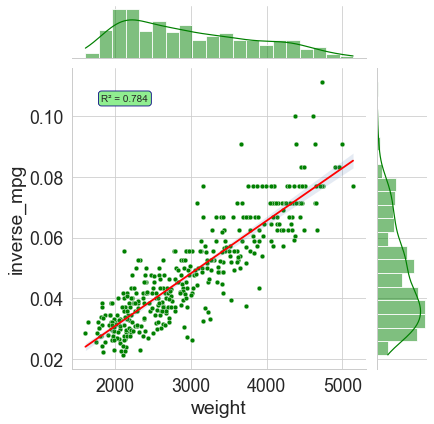

In [56]:
r, p = stats.pearsonr(cData['weight'],cData['inverse_mpg'])

joint_plot=sns.jointplot(data=cData,x='weight',y='inverse_mpg',color='green',marginal_kws=dict(bins=20,kde=True))
reg_plot=sns.regplot(data=cData,x='weight',y='inverse_mpg',scatter=False,ax=joint_plot.ax_joint)
joint_plot.ax_joint.annotate(f'R\u00b2 = {r**2:.3f}',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'lightgreen', 'ec': 'navy'})
regline = reg_plot.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)
plt.show()

<AxesSubplot:xlabel='weight', ylabel='inverse_mpg'>

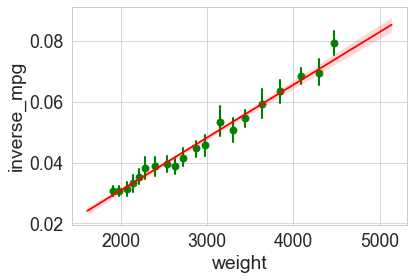

In [57]:


sns.regplot(data=cData,x='weight',y='inverse_mpg',x_bins=20,scatter=True,scatter_kws={'color': 'green'}, line_kws={'color': 'red'})


Text(0.5, 1.0, 'Residual ')

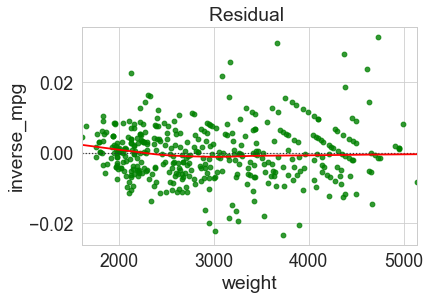

In [58]:
sns.residplot(data=cData,x='weight',y='inverse_mpg',lowess=True,scatter_kws={'color':'green'},line_kws={'color':'red'})
plt.title('Residual ')

# Case 3
Categorical data

In [59]:
mpg_category=pd.qcut(cData['mpg'],2,labels=[0,1])

In [60]:
y_train2=pd.qcut(y_train.iloc[:,0],2,labels=[0,1])

In [62]:
cData['binary_mpg']=pd.qcut(cData['mpg'],2,labels=[1,0])

<AxesSubplot:xlabel='binary_mpg', ylabel='count'>

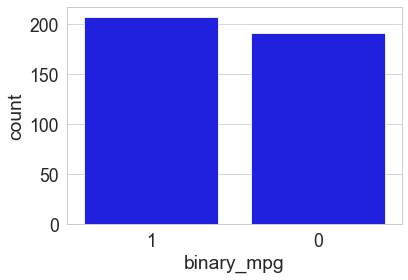

In [63]:
sns.countplot(data=cData,x='binary_mpg',color='blue')

In [65]:
def estimation (x):
    return np.count_nonzero(x)/len(x)

Text(0, 0.5, 'P(binay_mpg)')

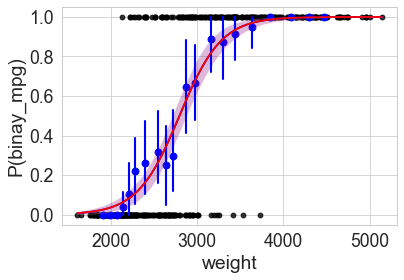

In [70]:
ax=sns.regplot(data=cData,x='weight',y='binary_mpg',logistic=True,
            scatter_kws={'color': 'black'}, line_kws={'color': 'blue'}
            )
sns.regplot(data=cData,x='weight',y='binary_mpg',x_bins=20,scatter=True,logistic=True,
            scatter_kws={'color': 'blue'}, ax=ax,
            line_kws={'color': 'red'},x_estimator=estimation)
plt.ylabel('P(binay_mpg)')
